In [190]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )


In [191]:
len(net_worths)

100

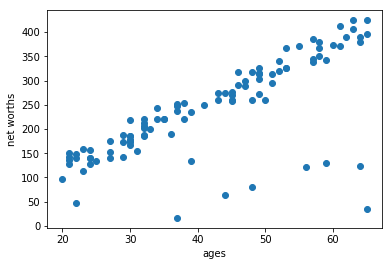

In [192]:
plt.scatter(ages,net_worths)
plt.xlabel("ages")
plt.ylabel("net worths")
#plt.legend()
plt.show()

In [193]:
ages_train = [ [ages[i]] for i in range(0, len(ages))]
ages_train

[[49],
 [21],
 [32],
 [30],
 [53],
 [51],
 [61],
 [23],
 [39],
 [21],
 [30],
 [43],
 [21],
 [29],
 [49],
 [45],
 [30],
 [47],
 [57],
 [20],
 [57],
 [52],
 [35],
 [27],
 [64],
 [35],
 [24],
 [24],
 [58],
 [47],
 [57],
 [53],
 [44],
 [64],
 [37],
 [45],
 [58],
 [48],
 [59],
 [46],
 [52],
 [22],
 [30],
 [33],
 [23],
 [30],
 [24],
 [32],
 [49],
 [36],
 [37],
 [29],
 [32],
 [63],
 [49],
 [48],
 [27],
 [53],
 [27],
 [37],
 [65],
 [49],
 [45],
 [51],
 [58],
 [55],
 [30],
 [21],
 [34],
 [32],
 [29],
 [63],
 [60],
 [34],
 [50],
 [38],
 [62],
 [41],
 [32],
 [31],
 [45],
 [32],
 [46],
 [61],
 [38],
 [30],
 [65],
 [43],
 [24],
 [22],
 [25],
 [48],
 [56],
 [39],
 [22],
 [37],
 [65],
 [44],
 [64],
 [59]]

In [199]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(ages_train,net_worths)
pred = clf.predict(ages_train)

In [201]:
clf.coef_

array([5.23059872])

In [202]:
residuals = net_worths - pred
residuals

array([ 3.90674035e+01, -2.17540144e+00,  2.47570694e+01,  4.02250932e+01,
        2.85276580e+01,  2.64891838e+01,  7.29501921e+01,  1.79773817e+01,
        9.54961989e+00,  1.14410855e+01,  4.96142240e-01,  1.37021176e+01,
        5.42913002e+00, -2.95205101e+01, -5.36523626e+00,  1.38097647e+01,
       -1.04921263e+01,  3.33792645e+01,  1.91278491e+01, -2.86755907e+01,
        6.66013060e+01,  2.76757982e+01,  1.62120666e+01, -2.17886715e+01,
        3.35364851e+01,  1.70799543e+01, -1.93717831e+01,  1.11620488e+01,
        2.62949581e+01,  2.12604428e+01,  2.52541984e+01,  7.02562892e+01,
        2.37661695e+01,  2.32699210e+01,  3.33512033e+01,  6.38642279e-01,
        4.24850038e+01, -1.10796834e+01,  1.27634122e+01,  3.00121413e+01,
        4.69606558e+01,  5.03665149e+00,  7.45153045e+00,  6.80062602e+00,
       -2.69417527e+01, -4.63238807e+00, -5.56468700e+00,  3.29457432e+01,
        3.60054862e+01, -1.93798993e+01,  2.33819844e+01,  1.04344921e+00,
       -1.73514135e+00,  

In [203]:
residuals.max()

74.165469627236

In [204]:
import numpy as np

resid = np.abs(residuals)
resid

array([3.90674035e+01, 2.17540144e+00, 2.47570694e+01, 4.02250932e+01,
       2.85276580e+01, 2.64891838e+01, 7.29501921e+01, 1.79773817e+01,
       9.54961989e+00, 1.14410855e+01, 4.96142240e-01, 1.37021176e+01,
       5.42913002e+00, 2.95205101e+01, 5.36523626e+00, 1.38097647e+01,
       1.04921263e+01, 3.33792645e+01, 1.91278491e+01, 2.86755907e+01,
       6.66013060e+01, 2.76757982e+01, 1.62120666e+01, 2.17886715e+01,
       3.35364851e+01, 1.70799543e+01, 1.93717831e+01, 1.11620488e+01,
       2.62949581e+01, 2.12604428e+01, 2.52541984e+01, 7.02562892e+01,
       2.37661695e+01, 2.32699210e+01, 3.33512033e+01, 6.38642279e-01,
       4.24850038e+01, 1.10796834e+01, 1.27634122e+01, 3.00121413e+01,
       4.69606558e+01, 5.03665149e+00, 7.45153045e+00, 6.80062602e+00,
       2.69417527e+01, 4.63238807e+00, 5.56468700e+00, 3.29457432e+01,
       3.60054862e+01, 1.93798993e+01, 2.33819844e+01, 1.04344921e+00,
       1.73514135e+00, 5.56382641e+01, 4.97531108e+01, 4.67393215e+01,
      

In [205]:
resid.min()

0.2706447756530679

In [206]:
c=0
l=[]
for i in range(0,len(resid)):
    
    if  resid[i] >74 :
        c = c + 1
        l.append(i)
        
c

10

In [207]:
l

[71, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [208]:
l

[71, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [209]:
ages_train_new=[]
net_worths_train=[]

for i in range(0,len(ages)):
    if not i in l:
        ages_train_new.append([ages[i]])
        net_worths_train.append(net_worths[i])
        

In [210]:
len(ages_train_new)

90

In [211]:
ages_train_new2 = [ [ages[i]] for i in range(0,len(ages))   ]

In [212]:
clf.fit(ages_train_new,net_worths_train)
pred = clf.predict(ages_train_new)

In [213]:
clf.coef_

array([6.36612435])

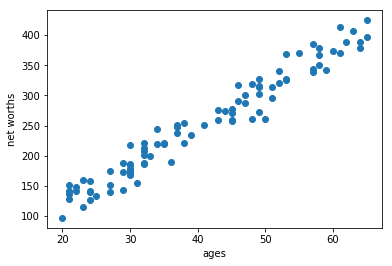

In [214]:
plt.scatter(ages_train_new,net_worths_train)
plt.xlabel("ages")
plt.ylabel("net worths")
#plt.legend()
plt.show()

In [215]:
resids=net_worths_train - pred

In [216]:
len(resids)

90

In [217]:
resids.max()

38.187567579561176

In [218]:
len(resids)

90

In [219]:
r_new = np.abs(resids)

In [220]:
len(r_new)

90

In [221]:
c=0
l=[]
for i in range(0,len(r_new)):
    
    if  r_new[i] >31.6 :
        c = c + 1
        l.append(i)
        
c

10

In [222]:
l

[3, 6, 13, 14, 31, 37, 49, 72, 73, 78]

In [223]:
len(ages_train_new)

90

In [224]:
ages_train_new2=[]
net_worths_train2=[]

for i in range(0,len(ages_train_new)):
    if not i in l:
        ages_train_new2.append(ages_train_new[i])
        net_worths_train2.append(net_worths_train[i])

In [231]:
len(net_worths_train2)

80

In [238]:
clf.fit(ages_train_new2,net_worths_train2)
pred2 = clf.predict(ages_train_new2)

In [239]:
len(pred2)

80

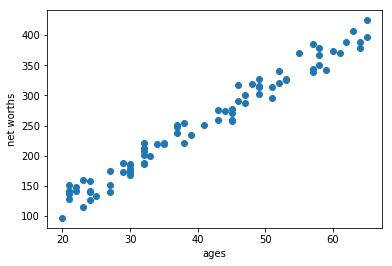

In [240]:
plt.scatter(ages_train_new2,net_worths_train2)
plt.xlabel("ages")
plt.ylabel("net worths")
#plt.legend()
plt.show()

In [242]:
clf.coef_

array([6.33930298])

In [244]:
r2= net_worths_train2 -pred2

In [246]:
r2_n = np.abs(r2)
len(r2_n)

80

In [256]:
c=0
l=[]
for i in range(0,len(r2_n)):
    
    if  r2_n[i] >23.3 :
        c = c + 1
        l.append(i)
        
c

10

In [257]:
l

[15, 16, 19, 32, 38, 41, 56, 58, 60, 71]

In [258]:
ages_train_new3=[]
net_worths_train3=[]

for i in range(0,len(ages_train_new2)):
    if not i in l:
        ages_train_new3.append(ages_train_new2[i])
        net_worths_train3.append(net_worths_train2[i])

In [259]:
len(ages_train_new3)

70

In [260]:
clf.fit(ages_train_new3,net_worths_train3)
pred2 = clf.predict(ages_train_new3)

In [261]:
clf.coef_

array([6.25870168])

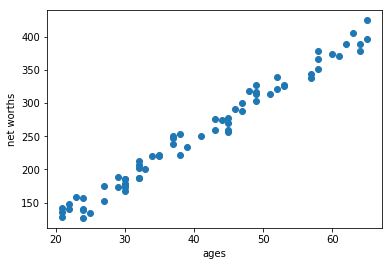

In [262]:
plt.scatter(ages_train_new3,net_worths_train3)
plt.xlabel("ages")
plt.ylabel("net worths")
#plt.legend()
plt.show()

In [ ]:
# a typical outlier fucntion to remove them 
#send the training data as it is ....it must be 2 D --
# foramt :  array  [   [f1,f2,f3....fk] , [f1,f2 ,....fk] , [f1,...fk] , .........   ]
#and then your trarget variable which is one or 2 dimesnional doesnt matter

#this fucntion was implemented with target variqable as 2 D input array
#make necessary changes and you can use 1D input for target variable too

"""

def outlierCleaner(predictions, ages, net_worths):
     #find lenght of training set and pick 10 % of it
    _len_train = len(ages)
    clean_points = int(_len_train/10)
    _final_len = _len_train - clean_points
    
    
    
    #finding residuals 
    
    residuals = net_worths - predictions
    #residuals could be positive or negative 
    residuals_mod = np.abs(residuals)
    #pick 10 % of maximum elements - erros from residuals_mod
    
    residuals_temp =  [ residuals_mod[i][j] for i in range(0,len(residuals_mod))  for j in range(0,len(residuals_mod[0]))]
    residuals_sorted = np.sort(residuals_temp)
    print("size are ::: "+str(len(resid_sorted)) + " and " + str(_final_len)) 
    max_errors = resid_sorted[_final_len:]
    #max_Erros has top clean_pointss % points with max errors 
    
    #we need to figure out those position points in the residuals_mod
    L =[]
    print("max erros:::: "+ str(max_errors))
    for i in range(0,len(residuals_mod)):
        if residuals_mod[i][0] in max_errors:
            L.append(i)
            
    print("List of values is ::::"+ str(L))
    print("lenght :::"+str(len(ages)))
    #list L has all the posiitons of the useless points 
    #lets remove them
    
    ages_train_new = [ [ages[i][0]] for i in range(0,len(ages)) if i not in L]
    net_worths_train_new = [ [net_worths_train[i][0] ] for i  in range(0,len(ages)) if i not in L ]
    
    cleaned_data = [ ages_train_new , net_worths_train_new]
    

    
    return cleaned_data




"""